# Data Science and Visualization Course
## Mini-Project

In [11]:
import piplite
await piplite.install('seaborn')

In [12]:
# All import statements
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Data Cleaning and Exploration

In [13]:
#Info about the dataset

# Column Explanations
# chocolate: Does it contain chocolate?
# fruity: Is it fruit flavored?
# caramel: Is there caramel in the candy?
# peanutalmondy: Does it contain peanuts, peanut butter or almonds?
# nougat: Does it contain nougat?
# crispedricewafer: Does it contain crisped rice, wafers, or a cookie component?
# hard: Is it a hard candy?
# bar: Is it a candy bar?
# pluribus: Is it one of many candies in a bag or box?
# sugarpercent: The percentile of sugar it falls under within the data set.
# pricepercent: The unit price percentile compared to the rest of the set.
# winpercent: The overall win percentage according to 269,000 matchups.

# Load the dataset
file_path = 'candy-data.csv'
candy_data = pd.read_csv(file_path)

# Check for missing values
missing_values = candy_data.isnull().sum()

# Display missing values if any
print("Missing values in each column:\n", missing_values)

# Display the first few rows of the cleaned dataset
candy_data.head()

Missing values in each column:
 competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64


,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [17]:
# Calculate the counts of the different components for each candy
component_counts = candy_data.drop(columns=['competitorname', 'sugarpercent', 'pricepercent', 'winpercent']).sum().reset_index()
component_counts.columns = ['ingredient', 'count']

print(component_counts)

         ingredient  count
0         chocolate     37
1            fruity     38
2           caramel     14
3    peanutyalmondy     14
4            nougat      7
5  crispedricewafer      7
6              hard     15
7               bar     21
8          pluribus     44


In [31]:
# Which candies emerged as the winners?

# Sort the dataframe based on winpercent in descending order
sorted_candy_data = candy_data.sort_values(by='winpercent', ascending=False)
winners = sorted_candy_data[['competitorname', 'winpercent']]

# Display the first few rows of the sorted dataframe
winners.head()

,competitorname,winpercent
52,ReeseÕs Peanut Butter cup,84.180290
51,ReeseÕs Miniatures,81.866257
79,Twix,81.642914
28,Kit Kat,76.768600
64,Snickers,76.673782


### Data Manipulation and Analysis

In [18]:
# Calculate the average win percentage for candies containing chocolate vs those that do not
chocolate_win_percent = candy_data.groupby('chocolate')['winpercent'].mean()
print("Average win percentage for candies not containing chocolate vs those that do:\n", chocolate_win_percent)

Average win percentage for candies containing chocolate vs those that do not:
 chocolate
0    42.142257
1    60.921529
Name: winpercent, dtype: float64


In [22]:
# Calculate the average price percentile for candies with and without nougat
nougat_price_percent = candy_data.groupby('nougat')['pricepercent'].mean()
print("Average price percentile for candies not containing nougat and those that do:\n", nougat_price_percent)

Average price percentile for candies not containing nougat and those that do:
 nougat
0    0.455846
1    0.614143
Name: pricepercent, dtype: float64


### Visualizations

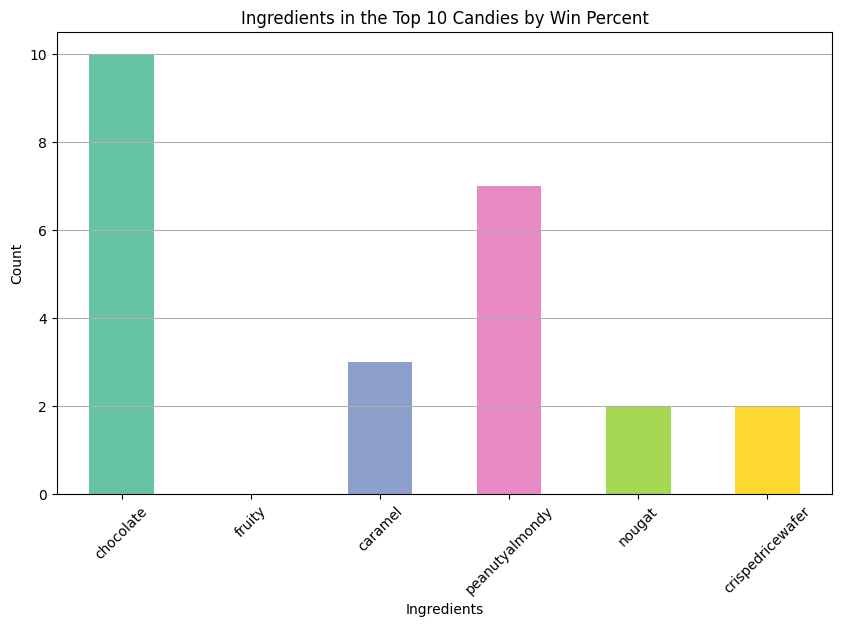

In [37]:
# Bar Graph

# Sort the dataframe based on winpercent in descending order
sorted_candy_data = candy_data.sort_values(by='winpercent', ascending=False)

# Select the top 10 candies by winpercent
top_10_candies = sorted_candy_data.head(10)

# List of ingredient columns
ingredients = ['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer']

# Calculate the sum of each ingredient for the top 10 candies
ingredient_counts = top_10_candies[ingredients].sum()

# Create a bar plot for the ingredients in the top 10 candies
plt.figure(figsize=(10, 6))
ingredient_counts.plot(kind='bar', color=sns.color_palette('Set2'))
plt.title('Ingredients in the Top 10 Candies by Win Percent')
plt.xlabel('Ingredients')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Display the plot
plt.show()

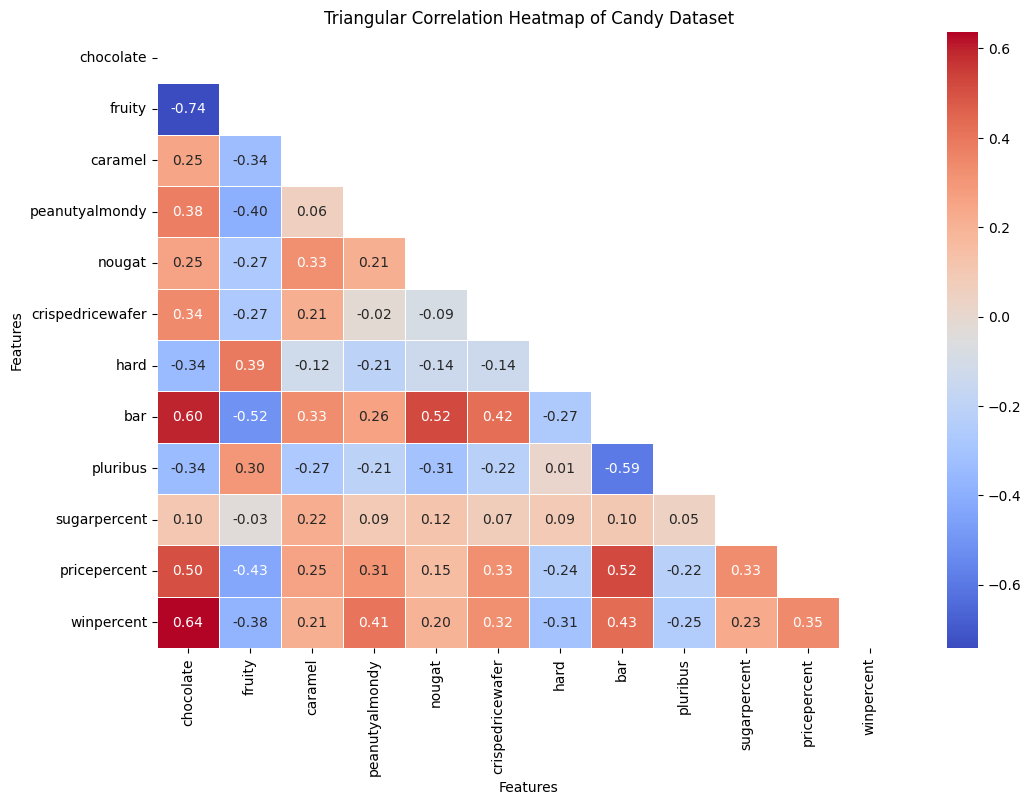

In [35]:
# Heatmap

# Remove the 'competitorname' column
candy_data_cleaned = candy_data.drop(columns=['competitorname'])

# Calculate the correlation matrix
correlation_matrix = candy_data_cleaned.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create a heatmap with an appropriate color palette and the mask
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5, mask=mask)

# Set titles and labels
plt.title('Triangular Correlation Heatmap of Candy Dataset')
plt.xlabel('Features')
plt.ylabel('Features')

# Display the heatmap
plt.show()

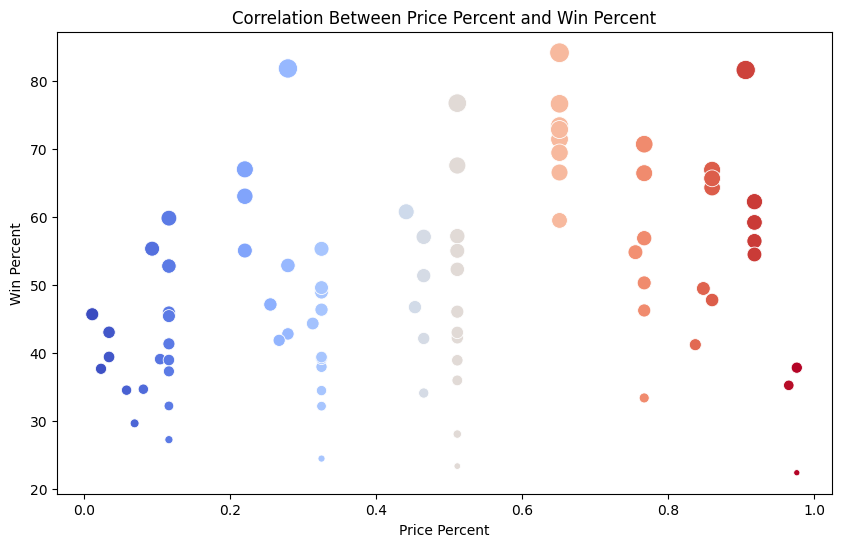

In [27]:
# Scatter Plot

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Plot the relationship between price percent and win percent
# Size of data points based on win percentage and applying an appropriate color palette
sns.scatterplot(data=candy_data, x='pricepercent', y='winpercent', size='winpercent', sizes=(20, 200), hue='pricepercent', palette='coolwarm', legend=None)
plt.title('Correlation Between Price Percent and Win Percent')
plt.xlabel('Price Percent')
plt.ylabel('Win Percent')

# Display the plot
plt.show()

# Good Luck and Have Fun!